# 📚 Teori Inti: Masalah Pelatihan Jaringan Syaraf Dalam (Deep Neural Networks)

Jaringan syaraf dalam (DNN) mampu menyelesaikan masalah kompleks, tapi pelatihannya tidak mudah karena beberapa tantangan seperti:

- **Vanishing/Exploding Gradients**: Gradien yang sangat kecil atau sangat besar saat backpropagation menyebabkan pembelajaran tidak efektif.
- **Kurangnya data latih**: Terutama untuk model besar, dapat menyebabkan overfitting.
- **Lambatnya pelatihan**: Model besar memerlukan waktu banyak.
- **Overfitting**: Terutama jika data latih terlalu sedikit atau noisy.

Berbagai teknik di bawah ini dikembangkan untuk mengatasi masalah-masalah tersebut.


In [3]:
# CHAPTER 11: Training Deep Neural Networks (Full Code)

import numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
import matplotlib.pyplot as plt

print("TensorFlow version:", tf.__version__)

# -----------------------------
# Glorot & He Initialization
# -----------------------------
layer_glorot = layers.Dense(10, activation="tanh", kernel_initializer="glorot_normal")
layer_he = layers.Dense(10, activation="relu", kernel_initializer="he_normal")

# -----------------------------
# Nonsaturating Activation Functions
# -----------------------------
model_relu = keras.models.Sequential([
    layers.Dense(10, kernel_initializer="he_normal"),
    layers.LeakyReLU(alpha=0.1)
])

model_elu = keras.models.Sequential([
    layers.Dense(10, activation="elu", kernel_initializer="he_normal")
])

model_selu = keras.models.Sequential([
    layers.Dense(10, activation="selu", kernel_initializer="lecun_normal")
])

# -----------------------------
# Batch Normalization
# -----------------------------
model_bn = keras.models.Sequential([
    layers.Flatten(input_shape=[28, 28]),
    layers.BatchNormalization(),
    layers.Dense(300, activation="elu", kernel_initializer="he_normal"),
    layers.BatchNormalization(),
    layers.Dense(100, activation="elu", kernel_initializer="he_normal"),
    layers.BatchNormalization(),
    layers.Dense(10, activation="softmax")
])

model_bn.compile(loss="sparse_categorical_crossentropy",
                 optimizer="adam",
                 metrics=["accuracy"])

# -----------------------------
# Gradient Clipping Example
# -----------------------------
optimizer_clipped = keras.optimizers.SGD(learning_rate=0.01, clipvalue=1.0)
model_bn.compile(loss="sparse_categorical_crossentropy",
                 optimizer=optimizer_clipped,
                 metrics=["accuracy"])

# -----------------------------
# Transfer Learning Example (Xception)
# -----------------------------
base_model = keras.applications.Xception(weights="imagenet", include_top=False)
base_model.trainable = False

model_tl = keras.models.Sequential([
    layers.Rescaling(1./255),
    layers.Resizing(150, 150),
    base_model,
    layers.GlobalAveragePooling2D(),
    layers.Dense(1, activation="sigmoid")
])

model_tl.compile(loss="binary_crossentropy",
                 optimizer="adam",
                 metrics=["accuracy"])

# -----------------------------
# Autoencoder for Unsupervised Pretraining
# -----------------------------
encoder = keras.models.Sequential([
    layers.Flatten(input_shape=[28, 28]),
    layers.Dense(100, activation="selu", kernel_initializer="lecun_normal"),
    layers.Dense(30, activation="selu", kernel_initializer="lecun_normal")
])

decoder = keras.models.Sequential([
    layers.Dense(100, activation="selu", kernel_initializer="lecun_normal", input_shape=[30]),
    layers.Dense(28 * 28, activation="sigmoid"),
    layers.Reshape([28, 28])
])

autoencoder = keras.models.Sequential([encoder, decoder])
autoencoder.compile(loss="binary_crossentropy", optimizer="adam")

# -----------------------------
# Optimizers Comparison
# -----------------------------
optimizers = {
    "momentum": keras.optimizers.SGD(learning_rate=0.01, momentum=0.9),
    "nesterov": keras.optimizers.SGD(learning_rate=0.01, momentum=0.9, nesterov=True),
    "rmsprop": keras.optimizers.RMSprop(learning_rate=0.001),
    "adam": keras.optimizers.Adam(learning_rate=0.001),
    "nadam": keras.optimizers.Nadam(learning_rate=0.001)
}

# Example model using Nadam
model_opt = keras.models.Sequential([
    layers.Flatten(input_shape=[28, 28]),
    layers.Dense(300, activation="relu"),
    layers.Dense(100, activation="relu"),
    layers.Dense(10, activation="softmax")
])

model_opt.compile(loss="sparse_categorical_crossentropy",
                  optimizer=optimizers["nadam"],
                  metrics=["accuracy"])

# -----------------------------
# Learning Rate Scheduling
# -----------------------------
lr_schedule = keras.optimizers.schedules.ExponentialDecay(
    initial_learning_rate=0.01,
    decay_steps=10000,
    decay_rate=0.1
)

model_lr = keras.models.Sequential([
    layers.Flatten(input_shape=[28, 28]),
    layers.Dense(300, activation="relu"),
    layers.Dense(100, activation="relu"),
    layers.Dense(10, activation="softmax")
])

model_lr.compile(loss="sparse_categorical_crossentropy",
                 optimizer=keras.optimizers.Adam(learning_rate=lr_schedule),
                 metrics=["accuracy"])


TensorFlow version: 2.18.0
83683744/83683744 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [5]:
# Load dataset Fashion MNIST
(X_train, y_train), (X_test, y_test) = keras.datasets.fashion_mnist.load_data()

# Normalisasi
X_train = X_train / 255.0
X_test = X_test / 255.0

# Latih model Batch Normalization
history = model_bn.fit(X_train, y_train, epochs=5, validation_split=0.1)

# Evaluasi
test_loss, test_acc = model_bn.evaluate(X_test, y_test)
print("Test Accuracy:", test_acc)


Epoch 1/5
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 12s 6ms/step - accuracy: 0.7631 - loss: 0.6894 - val_accuracy: 0.8447 - val_loss: 0.4221
Epoch 2/5
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 19s 5ms/step - accuracy: 0.8481 - loss: 0.4309 - val_accuracy: 0.8658 - val_loss: 0.3774
Epoch 3/5
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - accuracy: 0.8596 - loss: 0.3921 - val_accuracy: 0.8708 - val_loss: 0.3596
Epoch 4/5
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 11s 6ms/step - accuracy: 0.8720 - loss: 0.3629 - val_accuracy: 0.8728 - val_loss: 0.3548
Epoch 5/5
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 10s 6ms/step - accuracy: 0.8752 - loss: 0.3460 - val_accuracy: 0.8795 - val_loss: 0.3415
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8702 - loss: 0.3662
Test Accuracy: 0.8672999739646912


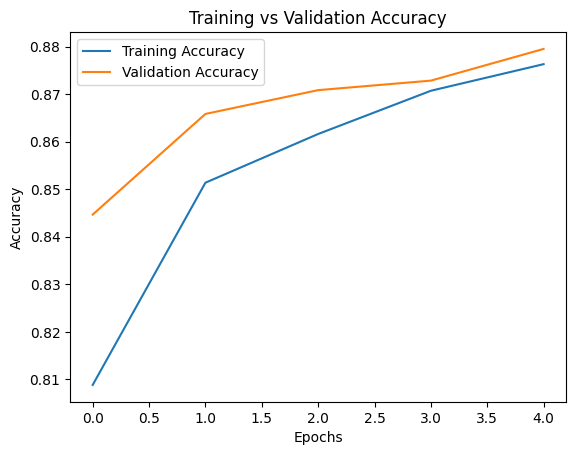

In [6]:
plt.plot(history.history["accuracy"], label="Training Accuracy")
plt.plot(history.history["val_accuracy"], label="Validation Accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.title("Training vs Validation Accuracy")
plt.show()
